In [1]:
! pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"devshah2021","key":"7ca39cb5f414dd2979e6b8aa38f5f8dd"}'}

In [ ]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                      title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/global-youtube-statistics-2023          Global YouTube Statistics 2023                  60KB  2023-07-28 15:36:38          11481        383  1.0              
nelgiriyewithana/top-spotify-songs-2023                  Most Streamed Spotify Songs 2023                47KB  2023-08-26 11:04:57           1537         64  1.0              
joebeachcapital/drug-overdose-deaths                     Drug Overdose Deaths                           590KB  2023-08-28 05:52:05            481         25  1.0              
joebeachcapital/life-longevity-factors                   Life Longevity Factors                           8KB  2023-08-2

In [7]:
!kaggle datasets download -d lasaljaywardena/pneumonia-chest-x-ray-dataset

pneumonia-chest-x-ray-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
! unzip /content/pneumonia-chest-x-ray-dataset.zip

Archive:  /content/pneumonia-chest-x-ray-dataset.zip
replace test/normal/IM-0001-0001.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [9]:
import numpy as np
import pandas as pd


In [10]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(500, 500, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

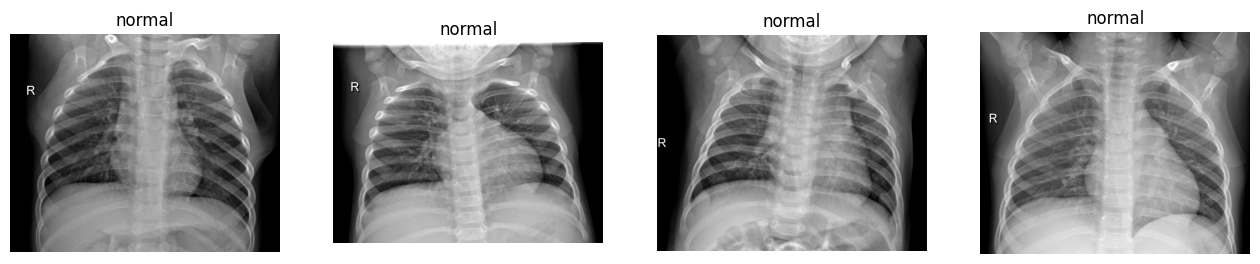

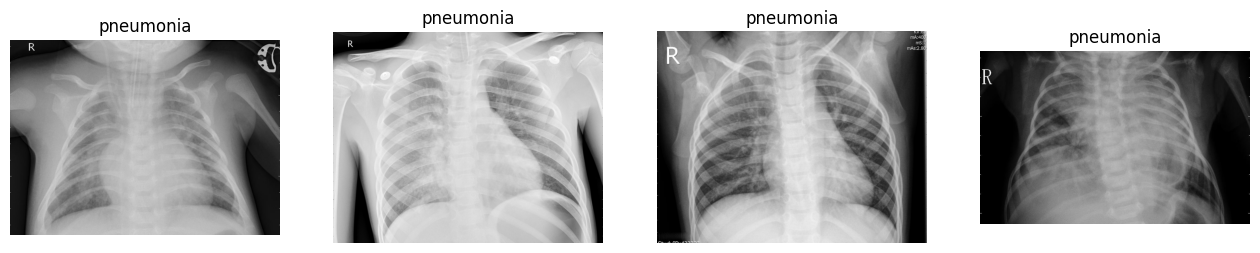

In [12]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Paths to the dataset
TRAIN_PATH = "/content/train/"
TEST_PATH = "/content/test/"
VAL_PATH = "/content/val/"

# Function to view random images from both classes
def view_random_images(path, class_name):
    plt.figure(figsize=(16, 16))

    for i in range(4):
        plt.subplot(1, 4, i + 1)

        # Corrected the path by adding a forward slash between path and class_name
        random_img = random.choice(os.listdir(path + '/' + class_name))
        img = cv2.imread(path + '/' + class_name + '/' + random_img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

    plt.show()

# Display random images from both classes
view_random_images(TRAIN_PATH, "normal")
view_random_images(TRAIN_PATH, "pneumonia")

In [13]:
# Import necessary library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image data generator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

# Create an image data generator for validation data
validation_datagen = ImageDataGenerator(rescale=1/255)

# Set up a generator for training data
train_generator = train_datagen.flow_from_directory(
    '/content/train/',
    target_size=(500, 500),
    class_mode='binary'
)

# Set up a generator for validation data
validation_generator = validation_datagen.flow_from_directory(
    '/content/test/',
    target_size=(500, 500),
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [14]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
results = model.fit(
      train_generator,
      epochs=15,
      verbose=1,
      validation_data = validation_generator)


Epoch 1/15
  1/163 [..............................] - ETA: 56:24 - loss: 0.6693 - accuracy: 0.7812